# Hey There Welcome to my kernal!!!!!
* Enjoy the visualizations process as I walk you through My Notebook

In [95]:
#Importing The required Libraries 
import os
import pandas as pd 
import sklearn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import scipy.stats as stats
from  sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,train_test_split,RandomizedSearchCV,GridSearchCV,GroupKFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor


In [3]:
#Importing the Dataset 
train_data=pd.read_excel("Data_Train.xlsx")
test_data=pd.read_excel("Test_set.xlsx")

In [4]:
print("Train data info")
print(train_data.info())
print()
print("=======================================================================================")
print("Test data info")
print()
print(test_data.info())

Train data info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB
None

Test data info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline      

In [5]:
#Lets have a look at teh dataset
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
#Now We will have a look at each variable one by one 
#Airline Variable 
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

**As we Can Observe There are very Less values for Trujet,Vistara Premium economy,Jet Airways Business and Multiple carriers Premium economy
We will drop these unique values as Our model wouldnt generalize well on these datapoints**

In [7]:
train_data.drop(train_data[(train_data.Airline=="Multiple carriers Premium economy") | (train_data.Airline=="Jet Airways Business") | 
           (train_data.Airline=="Vistara Premium economy") | (train_data.Airline=="Trujet")].index,inplace=True)
test_data.drop(test_data[(test_data.Airline=="Multiple carriers Premium economy") | (test_data.Airline=="Jet Airways Business") | 
           (test_data.Airline=="Vistara Premium economy") | (test_data.Airline=="Trujet")].index,inplace=True)

In [8]:
train_data.Airline.value_counts()

Jet Airways          3849
IndiGo               2053
Air India            1752
Multiple carriers    1196
SpiceJet              818
Vistara               479
Air Asia              319
GoAir                 194
Name: Airline, dtype: int64

Bamm!!

C:\Users\Jaskaran singh sohal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='count'>

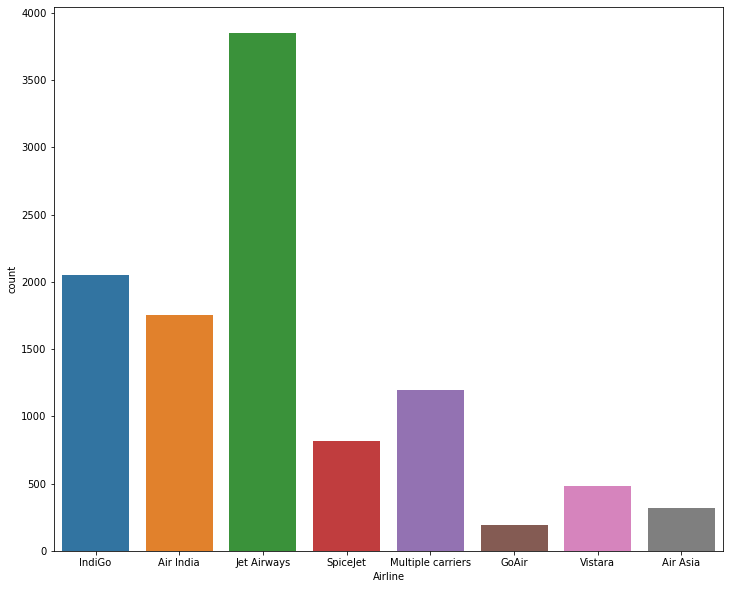

In [9]:
plt.figure(figsize=(12,10))
sns.countplot(train_data.Airline)

C:\Users\Jaskaran singh sohal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Airline', ylabel='Price'>

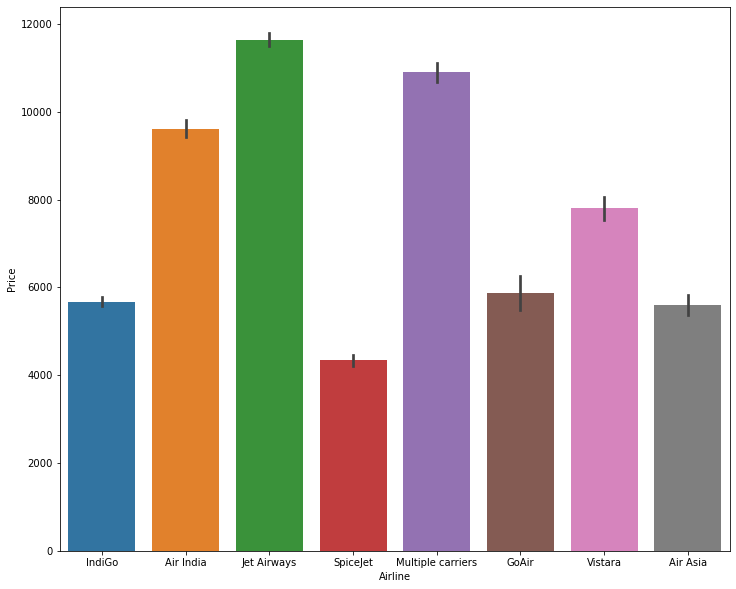

In [10]:
#Now we will look at the relation between categorical and Price using bar plot 
plt.figure(figsize=(12,10))
sns.barplot(train_data.Airline,train_data.Price)


In [11]:
# Now we will perform anova test 
"""
As we can Observe from the above feature that Indigo,GoAir,Air Asia is having almost the same mean
just so as to prove mathematically we will perform ANOVA Test

"""
Ha_rejected_list=[]
Airlines=train_data.Airline.unique()
for i,a in enumerate(Airlines):
    for i,b in enumerate(Airlines):
        if a!=b:
            
            g1=train_data[train_data.Airline==a]["Price"]
            g2=train_data[train_data.Airline==b]["Price"]
            t,p=stats.ttest_ind(g1,g2)
        
            if p<0.05: #Null hypothesis significant value 0.05
                
                
                print(f"{a} , {b}:                          p_value = {p:.4f} t_value = {t:.4f}               Ha_accepted: True ")
        
        
            else:
                print(f"{a}   , {b}:                          p_value = {p:.4f} t_value = {t:.4f}              Ha_accepted: False ")
                Ha_rejected_list.append([a,b])



        

IndiGo , Air India:                          p_value = 0.0000 t_value = -38.7261               Ha_accepted: True 
IndiGo , Jet Airways:                          p_value = 0.0000 t_value = -59.2085               Ha_accepted: True 
IndiGo , SpiceJet:                          p_value = 0.0000 t_value = 14.9919               Ha_accepted: True 
IndiGo , Multiple carriers:                          p_value = 0.0000 t_value = -49.7879               Ha_accepted: True 
IndiGo   , GoAir:                          p_value = 0.2793 t_value = -1.0822              Ha_accepted: False 
IndiGo , Vistara:                          p_value = 0.0000 t_value = -17.4264               Ha_accepted: True 
IndiGo   , Air Asia:                          p_value = 0.5350 t_value = 0.6205              Ha_accepted: False 
Air India , IndiGo:                          p_value = 0.0000 t_value = 38.7261               Ha_accepted: True 
Air India , Jet Airways:                          p_value = 0.0000 t_value = -16.9943  

In [12]:
Ha_rejected_list

[['IndiGo', 'GoAir'],
 ['IndiGo', 'Air Asia'],
 ['GoAir', 'IndiGo'],
 ['GoAir', 'Air Asia'],
 ['Air Asia', 'IndiGo'],
 ['Air Asia', 'GoAir']]

In [13]:
#So it proves Our asumption that the Indigo ,GoAir,Air Asia is having almost the same mean i.e we accepted the null hypothesis tht the means are equal
# Now we will Assign these group name a similar  name 
def Airline_mapper(f):
    if f in ['IndiGo','GoAir','Air Asia']:
        return 'IGA'  #I indicates Indigo ,G indicates GoAir and A in indicates Air Asia and we have IGA!!!! Bammmm
    else :
        return f
train_data['Airline']=train_data['Airline'].apply(Airline_mapper)
test_data['Airline']=test_data['Airline'].apply(Airline_mapper)


In [14]:
train_data['Airline'].value_counts(),test_data['Airline'].value_counts()

(Jet Airways          3849
 IGA                  2566
 Air India            1752
 Multiple carriers    1196
 SpiceJet              818
 Vistara               479
 Name: Airline, dtype: int64,
 Jet Airways          897
 IGA                  643
 Air India            440
 Multiple carriers    347
 SpiceJet             208
 Vistara              129
 Name: Airline, dtype: int64)

In [15]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10660 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10660 non-null  object
 1   Date_of_Journey  10660 non-null  object
 2   Source           10660 non-null  object
 3   Destination      10660 non-null  object
 4   Route            10659 non-null  object
 5   Dep_Time         10660 non-null  object
 6   Arrival_Time     10660 non-null  object
 7   Duration         10660 non-null  object
 8   Total_Stops      10659 non-null  object
 9   Additional_Info  10660 non-null  object
 10  Price            10660 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1.2+ MB


In [16]:
#Now comes the Date of Journey 
#First thing we need to do is to convert to date time format 
train_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'],infer_datetime_format=True)
test_data['Date_of_Journey']=pd.to_datetime(train_data['Date_of_Journey'],infer_datetime_format=True)
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10660 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10660 non-null  object        
 1   Date_of_Journey  10660 non-null  datetime64[ns]
 2   Source           10660 non-null  object        
 3   Destination      10660 non-null  object        
 4   Route            10659 non-null  object        
 5   Dep_Time         10660 non-null  object        
 6   Arrival_Time     10660 non-null  object        
 7   Duration         10660 non-null  object        
 8   Total_Stops      10659 non-null  object        
 9   Additional_Info  10660 non-null  object        
 10  Price            10660 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.2+ MB


In [17]:
#train_data
train_data['Dom']=train_data['Date_of_Journey'].dt.day    #Dates of Months
train_data['moy']=train_data['Date_of_Journey'].dt.month  #Months of year
train_data['year']=train_data['Date_of_Journey'].dt.year  #Year
#Test Data
test_data['Dom']=test_data['Date_of_Journey'].dt.day      #''''''
test_data['moy']=test_data['Date_of_Journey'].dt.month    #''''''
test_data['year']=test_data['Date_of_Journey'].dt.year    #''''''

In [18]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dom,moy,year
0,IGA,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IGA,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IGA,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [19]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Dom,moy,year
0,Jet Airways,2019-03-24,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,24.0,3.0,2019.0
1,IGA,2019-05-01,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,1.0,5.0,2019.0
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,9.0,6.0,2019.0
3,Multiple carriers,2019-05-12,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,12.0,5.0,2019.0
4,IGA,2019-03-01,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,1.0,3.0,2019.0


In [20]:
# As suspected the data is collected for a single year so we will drop year coulmn
train_data.year.value_counts()

2019    10660
Name: year, dtype: int64

C:\Users\Jaskaran singh sohal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Jaskaran singh sohal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Months of year')

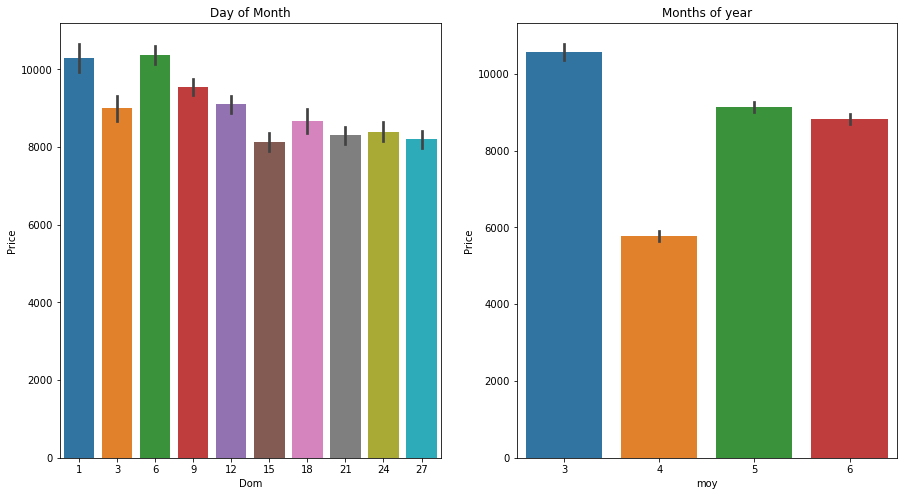

In [21]:
fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(15,8))
sns.barplot(train_data['Dom'],train_data['Price'],ax=ax[0]).set_title('Day of Month')
sns.barplot(train_data['moy'],train_data['Price'],ax=ax[1]).set_title('Months of year')

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10660 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10660 non-null  object        
 1   Date_of_Journey  10660 non-null  datetime64[ns]
 2   Source           10660 non-null  object        
 3   Destination      10660 non-null  object        
 4   Route            10659 non-null  object        
 5   Dep_Time         10660 non-null  object        
 6   Arrival_Time     10660 non-null  object        
 7   Duration         10660 non-null  object        
 8   Total_Stops      10659 non-null  object        
 9   Additional_Info  10660 non-null  object        
 10  Price            10660 non-null  int64         
 11  Dom              10660 non-null  int64         
 12  moy              10660 non-null  int64         
 13  year             10660 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object

In [23]:
#Since Duration variable explains the the variation in Daprture time and arrival time we are gonna drop arrival time and departure time 
train_data.drop(columns=['year'],inplace=True)
test_data.drop(columns=['year'],inplace=True)

In [24]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10660 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10660 non-null  object        
 1   Date_of_Journey  10660 non-null  datetime64[ns]
 2   Source           10660 non-null  object        
 3   Destination      10660 non-null  object        
 4   Route            10659 non-null  object        
 5   Dep_Time         10660 non-null  object        
 6   Arrival_Time     10660 non-null  object        
 7   Duration         10660 non-null  object        
 8   Total_Stops      10659 non-null  object        
 9   Additional_Info  10660 non-null  object        
 10  Price            10660 non-null  int64         
 11  Dom              10660 non-null  int64         
 12  moy              10660 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 1.4+ MB


In [25]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dom,moy
0,IGA,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IGA,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IGA,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [26]:
def Duration_mapper(x):
    if 'm' not in x:
        x=x.strip()+" "+"0m"
        return x
    if 'h' not in x:
        x="0h"+" "+x.strip()
        return x
    else:
        return x
    
        
train_data['Duration']=train_data['Duration'].apply(Duration_mapper)
test_data['Duration']=test_data['Duration'].apply(Duration_mapper)

#Extracting the feature

train_data['hour_duration']=train_data['Duration'].apply(lambda x : x.split()[0].replace('h',''))
train_data['min_duration']=train_data['Duration'].apply(lambda x : x.split()[1].replace('m',''))
test_data['hour_duration']=test_data['Duration'].apply(lambda x : x.split()[0].replace('h',''))
test_data['min_duration']=test_data['Duration'].apply(lambda x : x.split()[1].replace('m',''))

#TypeCasting

train_data['hour_duration']=train_data['hour_duration'].astype('int64')
train_data['min_duration']=train_data['min_duration'].astype('int64')
test_data['hour_duration']=test_data['hour_duration'].astype('int64')
test_data['min_duration']=test_data['min_duration'].astype('int64')

#Dropping the variable 



train_data.drop(columns=['Duration','Date_of_Journey'],inplace=True)
test_data.drop(columns=['Duration','Date_of_Journey'],inplace=True)

        

In [27]:

train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Dom,moy,hour_duration,min_duration
0,IGA,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,19,0
3,IGA,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,5,25
4,IGA,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,4,45


In [28]:
train_data['Duration']=train_data['hour_duration']+train_data['min_duration'].apply(lambda x:np.round_(x/60,decimals=3))
test_data['Duration']=test_data['hour_duration']+test_data['min_duration'].apply(lambda x:np.round_(x/60,decimals=3))

In [29]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Dom,moy,hour_duration,min_duration,Duration
0,IGA,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2,50,2.833
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 stops,No info,7662,1,5,7,25,7.417
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 stops,No info,13882,9,6,19,0,19.000
3,IGA,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,5,25,5.417
4,IGA,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,4,45,4.750


In [63]:
test_data.drop(columns=['hour_duration','min_duration'],inplace=True)


C:\Users\Jaskaran singh sohal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

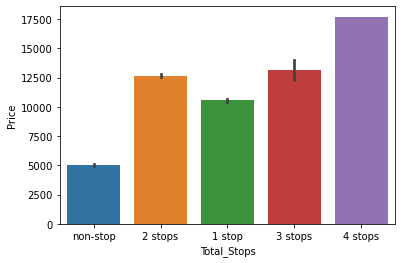

In [32]:
#Now we will visualize our duartion vs Price 
sns.barplot(train_data['Total_Stops'],train_data['Price'])

In [33]:
train_data.Total_Stops.value_counts()

1 stop      5607
non-stop    3488
2 stops     1518
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [34]:
# there's only one value for 4 stops we will remove these data points 
train_data.drop(train_data[train_data.Total_Stops=='4 stops'].index,inplace=True)
test_data.drop(test_data[test_data.Total_Stops=='4 stops'].index,inplace=True)
train_data.Total_Stops.value_counts()

1 stop      5607
non-stop    3488
2 stops     1518
3 stops       45
Name: Total_Stops, dtype: int64

In [35]:
mode=train_data['Total_Stops'].mode()
train_data['Total_Stops']=train_data['Total_Stops'].replace(np.nan,mode[0])

In [36]:
Ha_rejected_list_stops=[]
Stops=train_data.Total_Stops.unique()
for i,a in enumerate(Stops):
    for i,b in enumerate(Stops):
        if a!=b:
            
            g1=train_data[train_data.Total_Stops==a]["Price"]
            g2=train_data[train_data.Total_Stops==b]["Price"]
            t,p=stats.ttest_ind(g1,g2)
        
            if p<0.05: #Null hypothesis significant value 0.05
                
                
                print(f"{a} , {b}:                          p_value = {p:.4f} t_value = {t:.4f}               Ha_accepted: True ")
        
        
            else:
                print(f"{a}   , {b}:                          p_value = {p:.4f} t_value = {t:.4f}              Ha_accepted: False ")
                Ha_rejected_list_stops.append([a,b])



non-stop , 2 stops:                          p_value = 0.0000 t_value = -102.0940               Ha_accepted: True 
non-stop , 1 stop:                          p_value = 0.0000 t_value = -74.9297               Ha_accepted: True 
non-stop , 3 stops:                          p_value = 0.0000 t_value = -25.8327               Ha_accepted: True 
2 stops , non-stop:                          p_value = 0.0000 t_value = 102.0940               Ha_accepted: True 
2 stops , 1 stop:                          p_value = 0.0000 t_value = 18.8919               Ha_accepted: True 
2 stops   , 3 stops:                          p_value = 0.3444 t_value = -0.9457              Ha_accepted: False 
1 stop , non-stop:                          p_value = 0.0000 t_value = 74.9297               Ha_accepted: True 
1 stop , 2 stops:                          p_value = 0.0000 t_value = -18.8919               Ha_accepted: True 
1 stop , 3 stops:                          p_value = 0.0000 t_value = -4.2319               Ha_

In [37]:
Ha_rejected_list_stops

[['2 stops', '3 stops'], ['3 stops', '2 stops']]

* Since 2 Stop and 3 stops are having almost the same values (p_values>0.05) then we say that these two groups belong to the same group so we will group these to category as 1 category # This helps us reduce the dimentionality

In [38]:
def stop_mapper(x):
    if x in ['2 stops','3 stops'] :
        return '2 or 3 stops '
    else:
        return x

    
train_data['Total_Stops']=train_data['Total_Stops'].apply(stop_mapper)
test_data['Total_Stops']=test_data['Total_Stops'].apply(stop_mapper)

In [39]:
train_data.Total_Stops.value_counts()

1 stop           5608
non-stop         3488
2 or 3 stops     1563
Name: Total_Stops, dtype: int64

In [40]:
test_data.Total_Stops.value_counts()

1 stop           1427
non-stop          846
2 or 3 stops      390
Name: Total_Stops, dtype: int64

In [41]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Dom,moy,Duration
0,IGA,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2.833
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,2 or 3 stops,No info,7662,1,5,7.417
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,2 or 3 stops,No info,13882,9,6,19.000
3,IGA,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,1 stop,No info,6218,12,5,5.417
4,IGA,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,1 stop,No info,13302,1,3,4.750


In [42]:
train_data.drop(columns=['Route'],inplace=True)
test_data.drop(columns=['Route'],inplace=True)

In [43]:
test_data.Additional_Info.value_counts()

No info                         2141
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [45]:
train_data.Additional_Info.value_counts()

No info                         8325
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    6
No Info                            3
1 Short layover                    1
Business class                     1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

C:\Users\Jaskaran singh sohal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

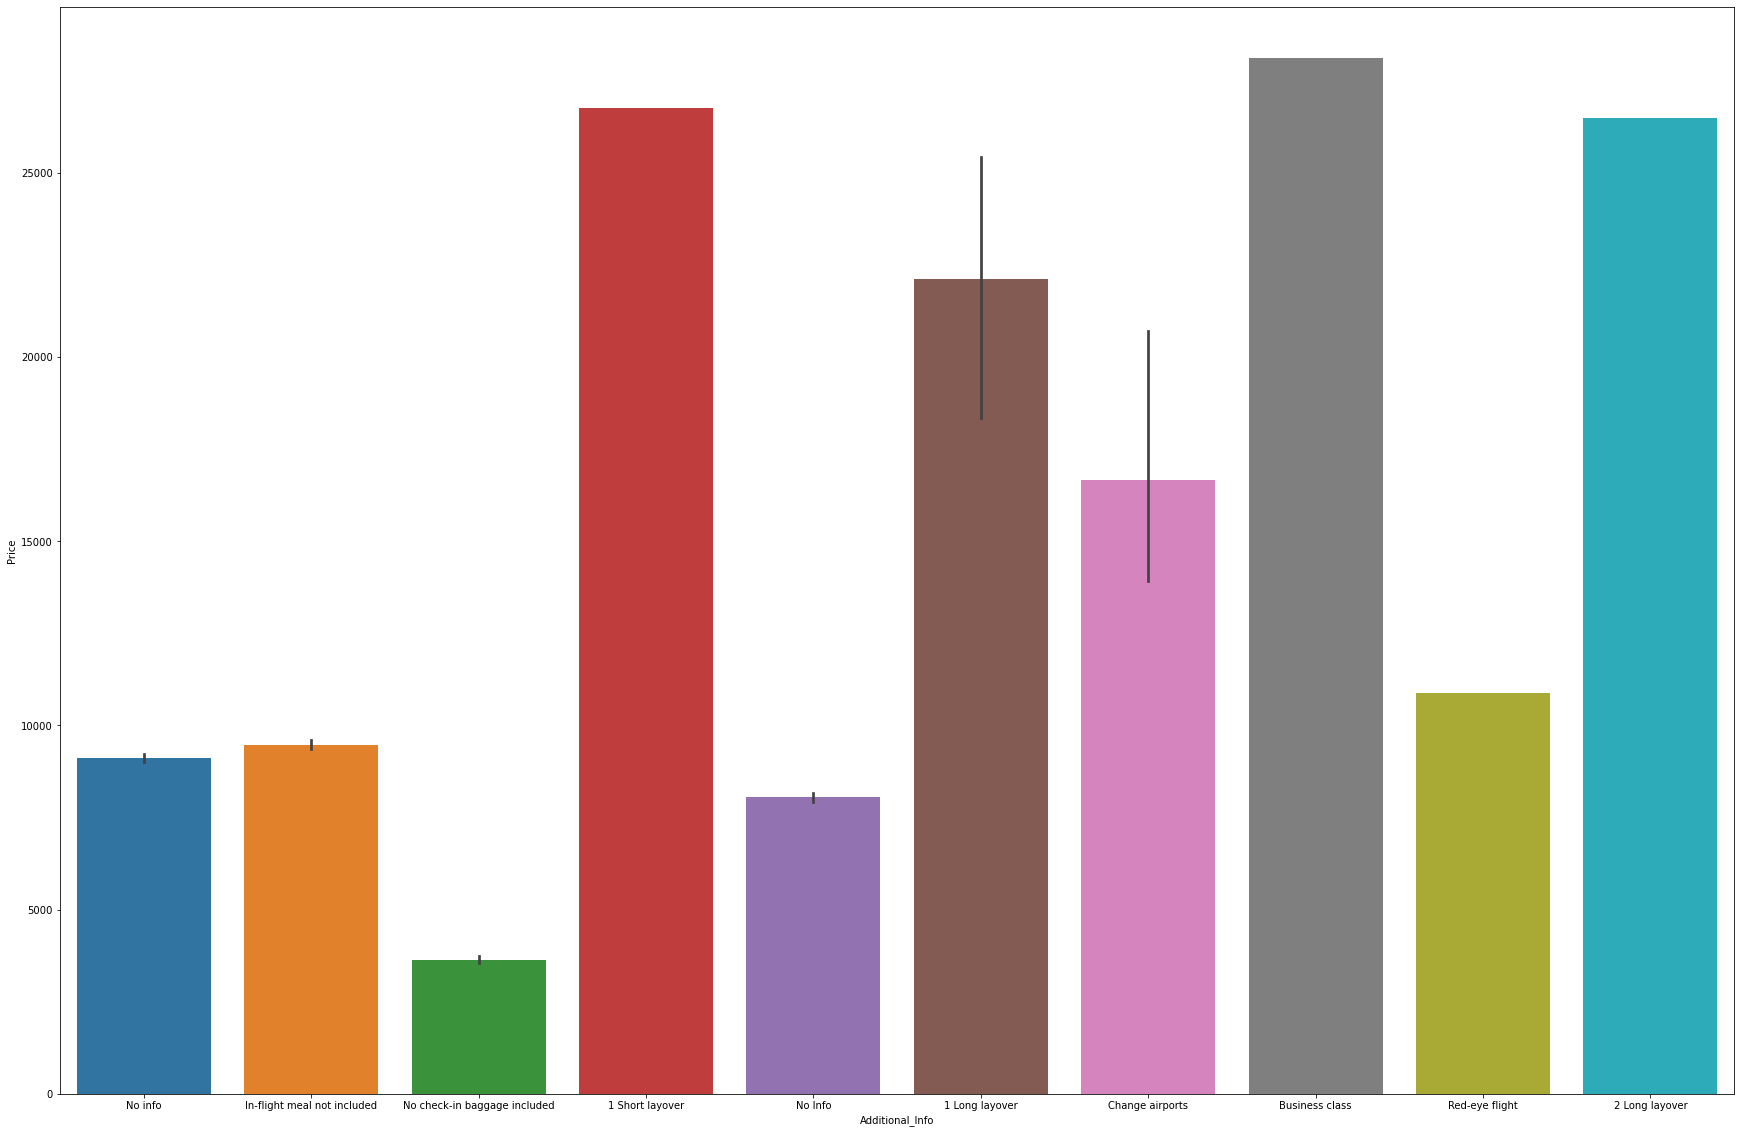

In [52]:
plt.figure(figsize=(30,20))
sns.barplot(train_data.Additional_Info,train_data.Price)

In [49]:
train_data.head()

,Airline,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Additional_Info,Price,Dom,moy,Duration
0,IGA,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,No info,3897,24,3,2.833
1,Air India,Kolkata,Banglore,05:50,13:15,2 or 3 stops,No info,7662,1,5,7.417
2,Jet Airways,Delhi,Cochin,09:25,04:25 10 Jun,2 or 3 stops,No info,13882,9,6,19.000
3,IGA,Kolkata,Banglore,18:05,23:30,1 stop,No info,6218,12,5,5.417
4,IGA,Banglore,New Delhi,16:50,21:35,1 stop,No info,13302,1,3,4.750


In [50]:
train_data['Dep_Time_hr']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_Time_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute
test_data['Dep_Time_hr']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_Time_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

train_data['Arrival_Time_hr']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_Time_min']=pd.to_datetime(train_data['Arrival_Time']).dt.minute
test_data['Arrival_Time_hr']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_Time_min']=pd.to_datetime(test_data['Arrival_Time']).dt.minute


train_data.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [59]:
test_data.drop(columns=['Dep_Time','Arrival_Time'],inplace=True)

In [51]:
train_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dom,moy,Duration,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IGA,Banglore,New Delhi,non-stop,No info,3897,24,3,2.833,22,20,1,10
1,Air India,Kolkata,Banglore,2 or 3 stops,No info,7662,1,5,7.417,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 or 3 stops,No info,13882,9,6,19.000,9,25,4,25
3,IGA,Kolkata,Banglore,1 stop,No info,6218,12,5,5.417,18,5,23,30
4,IGA,Banglore,New Delhi,1 stop,No info,13302,1,3,4.750,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,IGA,Kolkata,Banglore,non-stop,No info,4107,9,4,2.500,19,55,22,25
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2.583,20,45,23,20
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,3.000,8,20,11,20
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2.667,11,30,14,10


In [52]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Dom,moy,Duration,Dep_Time_hr,Dep_Time_min,Arrival_Time_hr,Arrival_Time_min
0,IGA,Banglore,New Delhi,non-stop,No info,3897,24,3,2.833,22,20,1,10
1,Air India,Kolkata,Banglore,2 or 3 stops,No info,7662,1,5,7.417,5,50,13,15
2,Jet Airways,Delhi,Cochin,2 or 3 stops,No info,13882,9,6,19.000,9,25,4,25
3,IGA,Kolkata,Banglore,1 stop,No info,6218,12,5,5.417,18,5,23,30
4,IGA,Banglore,New Delhi,1 stop,No info,13302,1,3,4.750,16,50,21,35


In [54]:
train_data.shape,test_data.shape

((10659, 13), (2663, 16))

In [64]:
df=pd.concat([train_data,test_data],ignore_index=True)
df.shape

(13322, 13)

In [65]:
df=pd.get_dummies(df,columns=['Airline','Source','Destination','Total_Stops','Additional_Info'],drop_first=True)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13322 entries, 0 to 13321
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Price                                         10659 non-null  float64
 1   Dom                                           13318 non-null  float64
 2   moy                                           13318 non-null  float64
 3   Duration                                      13322 non-null  float64
 4   Dep_Time_hr                                   13322 non-null  int64  
 5   Dep_Time_min                                  13322 non-null  int64  
 6   Arrival_Time_hr                               13322 non-null  int64  
 7   Arrival_Time_min                              13322 non-null  int64  
 8   Airline_IGA                                   13322 non-null  uint8  
 9   Airline_Jet Airways                           13322 non-null 

In [73]:
Train_data=df.loc[:train_data.shape[0]-1,]
Test_data=df.loc[train_data.shape[0]:,]
Train_data.shape,Test_data.shape

((10659, 33), (2663, 33))

In [75]:
Test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2663 entries, 10659 to 13321
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Price                                         0 non-null      float64
 1   Dom                                           2663 non-null   float64
 2   moy                                           2663 non-null   float64
 3   Duration                                      2663 non-null   float64
 4   Dep_Time_hr                                   2663 non-null   int64  
 5   Dep_Time_min                                  2663 non-null   int64  
 6   Arrival_Time_hr                               2663 non-null   int64  
 7   Arrival_Time_min                              2663 non-null   int64  
 8   Airline_IGA                                   2663 non-null   uint8  
 9   Airline_Jet Airways                           2663 non-nul

In [68]:
#Now the final step is to impute the missing values before modelling 

mode2=df['Dom'].mode()
mode3=df['moy'].mode()



In [69]:

df['Dom']=df['Dom'].replace(np.nan,mode2[0])
df['moy']=df['moy'].replace(np.nan,mode3[0])

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13322 entries, 0 to 13321
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Price                                         10659 non-null  float64
 1   Dom                                           13322 non-null  float64
 2   moy                                           13322 non-null  float64
 3   Duration                                      13322 non-null  float64
 4   Dep_Time_hr                                   13322 non-null  int64  
 5   Dep_Time_min                                  13322 non-null  int64  
 6   Arrival_Time_hr                               13322 non-null  int64  
 7   Arrival_Time_min                              13322 non-null  int64  
 8   Airline_IGA                                   13322 non-null  uint8  
 9   Airline_Jet Airways                           13322 non-null 

In [76]:
#Our data is ready for the modelling 

X=Train_data.drop(columns=['Price'])
Y=Train_data.loc[:,'Price']

#Splitting the dataset

x_train,x_val,y_train,y_val=train_test_split(X,Y,train_size=0.8,random_state=101)
x_train.shape,x_val.shape,y_train.shape,y_val.shape



((8527, 32), (2132, 32), (8527,), (2132,))

In [87]:
RFR_model=RandomForestRegressor(n_estimators=100,random_state=101)
RFR_model.fit(x_train,y_train)
train_preds=RFR_model.predict(x_train)
test_preds=RFR_model.predict(x_val)
r2_train=r2_score(y_train,train_preds)
r2_test=r2_score(y_val,test_preds)
mae_train=mean_absolute_error(y_train,train_preds)
mae_test=mean_absolute_error(y_val,test_preds)
XGBreg=XGBRegressor()
XGBreg.fit(x_train,y_train)
train_preds_Xg=XGBreg.predict(x_train)
test_preds_Xg=XGBreg.predict(x_val)
r2_train_Xg=r2_score(y_train,train_preds_Xg)
r2_test_Xg=r2_score(y_val,test_preds_Xg)
mae_train=mean_absolute_error(y_train,train_preds_Xg)
mae_test=mean_absolute_error(y_val,test_preds_Xg)

In [90]:
print(f'The R2 Score for the RandomForestRegressor on Training data is :{r2_train*100:.4f}')
print(f'The R2 Score for the RandomForestRegressor on Test data is :{r2_test*100:.4f}')
        
print(f'the R2 score for XGBOOST Regressor on training data is {r2_train_Xg*100:.4f}')
print(f'the R2 score for XGBOOST regressor on testing data is {r2_test_Xg*100:.4f}')

The R2 Score for the RandomForestRegressor on Training data is :98.2913
The R2 Score for the RandomForestRegressor on Test data is :89.3173
the R2 score for XGBOOST Regressor on training data is 96.7833
the R2 score for XGBOOST regressor on testing data is 88.5208


In [112]:
param={'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
       'max_features':['auto', 'sqrt'],
       'max_depth' :[int(x) for x in np.linspace(10, 110, num = 11)],
       'min_samples_split' : [2, 5, 10],
       'min_samples_leaf' : [1, 2, 4],
       'bootstrap' :[True, False]}

rscv=RandomizedSearchCV(RFR_model,param_distributions=param,cv=5,n_iter=10,scoring='r2',n_jobs=-1)


In [113]:
rscv.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='r2')

In [114]:
rscv.best_estimator_

RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=1000,
                      random_state=101)

In [115]:
RFR=RandomForestRegressor(max_depth=20, min_samples_leaf=4, n_estimators=1000,
                      random_state=101)
RFR.fit(x_train,y_train)
train_preds=RFR.predict(x_train)
test_preds=RFR.predict(x_val)
r2_train=r2_score(y_train,train_preds)
r2_test=r2_score(y_val,test_preds)

Now The Model will be trained on full data 

In [118]:
rscv.fit(X,Y)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=101),
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   scoring='r2')

In [119]:
rscv.best_estimator_

RandomForestRegressor(max_depth=100, min_samples_split=10, n_estimators=1200,
                      random_state=101)

In [123]:
Rmodel=RandomForestRegressor(max_depth=100, min_samples_split=10, n_estimators=1200,
                      random_state=101)
Rmodel.fit(X,Y)
Rpredictions=Rmodel.predict(Train_data.drop(columns=['Price']))
submission=pd.DataFrame({'predictions':Rpredictions})
submission.to_csv('submission.csv')

In [124]:
submission

,predictions
0,5105.088104
1,8086.900243
2,13936.267146
3,6285.387631
4,11271.117565
...,...
10654,4151.369609
10655,4439.727230
10656,7229.119265
10657,16476.570882
